# **Import Libraries**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

# **Read Data**

In [6]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)


In [7]:
data = pd.read_csv("/content/supply_chain_data.csv")
data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Shipping costs,Supplier name,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,4,Carrier B,2.956572,Supplier 3,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,2,Carrier A,9.716575,Supplier 3,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,2,Carrier B,8.054479,Supplier 1,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,6,Carrier C,1.729569,Supplier 5,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,8,Carrier A,3.890548,Supplier 1,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [8]:
data.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [6]:
data['Product type'].unique()

array(['haircare', 'skincare', 'cosmetics'], dtype=object)

In [7]:
data['Transportation modes'].mode()

0    Road
Name: Transportation modes, dtype: object

In [8]:
data['Transportation modes'].unique()

array(['Road', 'Air', 'Rail', 'Sea'], dtype=object)

# **Product Type and Price**
#####  analyzing the Supply Chain by looking at the relationship between the price of the products and the revenue generated by them

---



In [11]:
fig = px.scatter(data, x='Price',
                 y='Revenue generated',
                 color='Product type',
                 hover_data=['Number of products sold'],
                 trendline="ols")
fig.show()

 The company derives more revenue from skincare products, and the higher the price of skincare products, the more revenue they generate

---



# **Sales by Product Type**


In [12]:
sales_data = data.groupby('Product type')['Number of products sold'].sum().reset_index()
sales_data

,Product type,Number of products sold
0,cosmetics,11757
1,haircare,13611
2,skincare,20731


In [29]:

pie_chart = px.pie(sales_data, values='Number of products sold', names='Product type',
                   title='Sales by Product Type',
                   hover_data=['Number of products sold'],
                   hole=0.5,
                   color_discrete_sequence=px.colors.qualitative.Pastel)

pie_chart.update_traces(textposition='inside', textinfo='percent+label')
pie_chart.show()

So 45% of the business comes from skincare products, 29.5% from haircare, and 25.5% from cosmetics

---



In [25]:
customer_data = data.groupby('Customer demographics')['Number of products sold'].sum().reset_index()
customer_data

,Customer demographics,Number of products sold
0,Female,12801
1,Male,7507
2,Non-binary,10580
3,Unknown,15211


In [28]:
pie_chart = px.pie(customer_data, values='Number of products sold', names='Customer demographics',
                   title='Sales by Customer',
                   hover_data=['Number of products sold'],
                   hole=0.5,
                   color_discrete_sequence=px.colors.qualitative.G10)

pie_chart.update_traces(textposition='inside', textinfo='percent+label')
pie_chart.show()

# **Total Revenue by Shipping Carrier**

In [12]:
total_revenue = data.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()
total_revenue

,Shipping carriers,Revenue generated
0,Carrier A,142629.994607
1,Carrier B,250094.646988
2,Carrier C,184880.177143


<Axes: xlabel='Shipping carriers', ylabel='Revenue generated'>

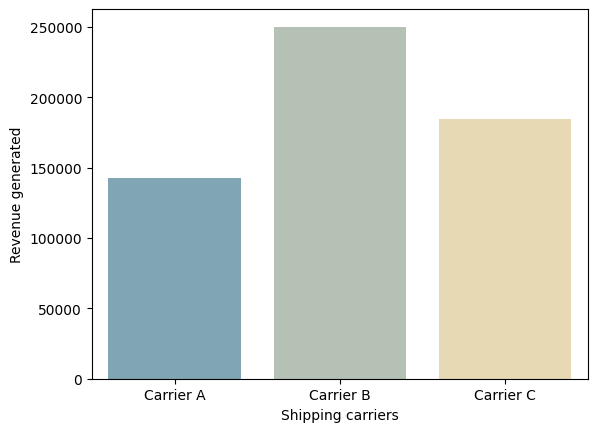

In [16]:
sns.barplot(total_revenue,x='Shipping carriers',y='Revenue generated',palette="blend:#7AB,#EDA")

####The company is using three carriers for transportation, and Carrier B helps the company in generating more revenue.


---



#**Total Revenue based on Location**

In [18]:
total_revenue = data.groupby('Location')['Revenue generated'].sum().reset_index()
total_revenue

,Location,Revenue generated
0,Bangalore,102601.723882
1,Chennai,119142.815748
2,Delhi,81027.701225
3,Kolkata,137077.551005
4,Mumbai,137755.026877


<Axes: xlabel='Revenue generated', ylabel='Location'>

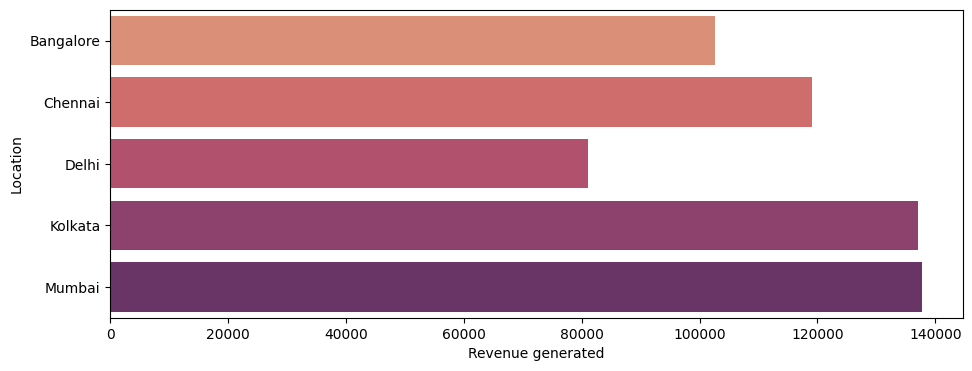

In [25]:
plt.figure(figsize=(11,4))
sns.barplot(total_revenue,x='Revenue generated',y='Location',palette='flare')


### So the products  are being shipped to Mumbai helps the company in generating more revenue.


---



# **Product Type**
### Let’s have a look at the Average lead time and Average Manufacturing Costs for all products of the company:

In [26]:
avg_lead_time = data.groupby('Product type')['Lead time'].mean().reset_index()
avg_manufacturing_costs = data.groupby('Product type')['Manufacturing costs'].mean().reset_index()
result = pd.merge(avg_lead_time, avg_manufacturing_costs, on='Product type')
result.rename(columns={'Lead time': 'Average Lead Time', 'Manufacturing costs': 'Average Manufacturing Costs'}, inplace=True)
result

,Product type,Average Lead Time,Average Manufacturing Costs
0,cosmetics,13.538462,43.052740
1,haircare,18.705882,48.457993
2,skincare,18.000000,48.993157


# **Analyzing SKUs**

### SKU stands for Stock Keeping Units. They’re like special codes that help companies keep track of all the different things they have for sale.Let’s analyze the revenue generated by each SKU:

## **Revenue generated by SKUs**

In [32]:
revenue_chart = px.line(data, x='SKU',
                        y='Revenue generated',
                        title='Revenue Generated by SKU')
revenue_chart.show()

# **Stock Levels by SKUs**
###Stock levels refer to the number of products a store or business has in its inventory. Now let’s have a look at the stock levels of each SKU:






In [34]:
stock_chart = px.line(data, x='SKU',
                      y='Stock levels',
                      title='Stock Levels by SKU')
stock_chart.show()

# **Order Quantity by SKUs**

In [35]:
order_quantity_chart = px.bar(data, x='SKU',
                              y='Order quantities',
                              title='Order Quantity by SKU')
order_quantity_chart.show()

# **Cost Analysis**
### Now let’s analyze the shipping cost of Carriers:






In [36]:
shipping_cost_chart = px.bar(data, x='Shipping carriers',
                             y='Shipping costs',
                             title='Shipping Costs by Carrier')
shipping_cost_chart.show()

####In one of the above visualizations, we discovered that Carrier B helps the company in more revenue. It is also the most costly Carrier among the three.


---




# **Cost Distribution by Transportation Mode**

In [37]:
transportation_chart = px.pie(data,
                              values='Costs',
                              names='Transportation modes',
                              title='Cost Distribution by Transportation Mode',
                              hole=0.5,
                              color_discrete_sequence=px.colors.qualitative.Pastel)
transportation_chart.show()

####So the company spends more on Road and Rail modes of transportation for the transportation of Goods.


---



# **Analyzing Defect Rate**

####The defect rate in the supply chain refers to the percentage of products that have something wrong or are found broken after shipping. Let’s have a look at the average defect rate of all product types:

In [38]:
defect_rates_by_product = data.groupby('Product type')['Defect rates'].mean().reset_index()

fig = px.bar(defect_rates_by_product, x='Product type', y='Defect rates',
             title='Average Defect Rates by Product Type')
fig.show()

####So the defect rate of haircare products is higher.


---



# **Defect Rates by Mode of Transportation**

In [39]:
pivot_table = pd.pivot_table(data, values='Defect rates',
                             index=['Transportation modes'],
                             aggfunc='mean')

transportation_chart = px.pie(values=pivot_table["Defect rates"],
                              names=pivot_table.index,
                              title='Defect Rates by Transportation Mode',
                              hole=0.5,
                              color_discrete_sequence=px.colors.qualitative.Pastel)
transportation_chart.show()

####Road transportation results in a higher defect rate, and Air transportation has the lowest defect rate.


---

